In [1]:
"""
REMOVE THIS MESSAGE AND QUOTES IF ANY PACKAGES ARE NOT INSTALLED
pip install numpy
pip install scipy
pip install matplotlib
pip install pandas
"""

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#opens GDP data and coverts lists to 1d 
my_csv_totalGDP = pd.read_csv('Countries by GDP per Capita - Sheet1.csv', sep=',', usecols=[1])
my_csv_totalGDP = my_csv_totalGDP.iloc[:, 0].tolist() #converts 2d dataframe to a 1d list

my_csv_lowerincomeGDP = pd.read_csv('Lower Income Countries by GDP per capita - Sheet1.csv', sep=',', usecols=[1])
my_csv_lowerincomeGDP = my_csv_lowerincomeGDP.iloc[:, 0].tolist() 

my_csv_upperincomeGDP = pd.read_csv('Upper Income Countries by GDP Per capita - Sheet1.csv', sep=',', usecols=[1])
my_csv_upperincomeGDP = my_csv_upperincomeGDP.iloc[:, 0].tolist() 


#opens total agriculture data 
my_csv_totalherbicide = pd.read_csv('Herbicide Use By Country.csv', sep=',', skiprows=1, usecols=[1])
my_csv_totalherbicide = my_csv_totalherbicide.iloc[:, 0].tolist() 

my_csv_totalinsecticide = pd.read_csv('Insecticide Use By Country.csv', sep=',', skiprows=1, usecols=[1])
my_csv_totalinsecticide = my_csv_totalinsecticide.iloc[:, 0].tolist() 

my_csv_totalfungicide = pd.read_csv('Fungicides Divided By Population.csv', sep=',', skiprows=1, usecols=[2])
my_csv_totalfungicide = my_csv_totalfungicide.iloc[:, 0].tolist() 

my_csv_totalPesticide = pd.read_csv('Pesticides (Total) Divided by Population.csv', sep=',', skiprows=1, usecols=[2])
my_csv_totalPesticide = my_csv_totalPesticide.iloc[:, 0].tolist() 


#opens pesticide per capita data
my_csv_PerCapitaInsecticide = pd.read_csv('Insecticides Divided by Population.csv', sep=',', skiprows=1, usecols=[3])
my_csv_PerCapitaInsecticide = my_csv_PerCapitaInsecticide.iloc[:, 0].tolist() 
                         
my_csv_PerCapitaHerbicide = pd.read_csv('Herbicides Divided by Population.csv', sep=',', skiprows=1, usecols=[3])
my_csv_PerCapitaHerbicide = my_csv_PerCapitaHerbicide.iloc[:, 0].tolist()
                               
my_csv_PerCapitaFungicide = pd.read_csv('Fungicides Divided By Population.csv', sep=',', skiprows=1, usecols=[3])
my_csv_PerCapitaFungicide = my_csv_PerCapitaFungicide.iloc[:, 0].tolist()

my_csv_PerCapitaPesticide = pd.read_csv('Pesticides (Total) Divided by Population.csv', sep=',', skiprows=1, usecols=[3])
my_csv_PerCapitaPesticide = my_csv_PerCapitaPesticide.iloc[:, 0].tolist()


#opens Non-Hodgkin's Lymphoma data
my_csv_NHLbyLowerGDPCountry = pd.read_csv('Combined Rate of NHL by Country - Lower GDP.csv', sep = ',', header = None, skiprows = 1, usecols = [1])
my_csv_NHLbyLowerGDPCountry = my_csv_NHLbyLowerGDPCountry.iloc[:, 0].tolist()
                             
my_csv_NHLbyUpperGDPCountry = pd.read_csv('Combined Rate of NHL by Country - Upper GDP.csv', sep = ',', header = None, skiprows = 1, usecols = [1])
my_csv_NHLbyUpperGDPCountry = my_csv_NHLbyUpperGDPCountry.iloc[:, 0].tolist()
                               
my_csv_NHLbycountry = pd.read_csv('Combined Rate of NHL by Country - Sheet1.csv', sep=',', skiprows=1, usecols=[1])
my_csv_NHLbycountry = my_csv_NHLbycountry.iloc[:, 0].tolist()

In [3]:
class regression:
    
    def __init__(self, x_data, y_data): #Initialize the variables
        self.x_data = np.array(x_data) #.reshape(-1,1) #makes sure x_data is an array and adjusts scale
        self.y_data = np.array(y_data) #makes sure y_data is an array
        self.ymean = np.mean(y_data) #Mean of y-values                      
                
        def func(x, a, b): #Function y=ax^m
            y = a*x + b
            return y
        
        self.a = optimize.curve_fit(func, self.x_data, self.y_data)[0] #alpha value found using optimize.curve_fit
        self.alpha = self.a[0] #Indexes for alpha value
        self.beta = self.a[1] #indexes for beta value
    
    
    def SSres(self): #Returns value of SSres        
        return np.sum((self.y_data - (self.alpha*self.x_data + self.beta) )**2)
    
    
    def SSreg(self): #Returns value of SSreg
        return np.sum(( (self.alpha*self.x_data + self.beta) - self.ymean)**2)
    
    
    def SStot(self): #Returns value of SStot
        return self.SSres()+self.SSreg()
    
    
    def R2(self): #Returns SSreg/SStot
        return (self.SSreg())/(self.SStot())
        
        
    def __str__(self): #Returns string with alpha value and R^2 value
        return f"Best fit line of y = {self.alpha:.4e}*x + {self.beta:.4e} with R^2 = {self.R2()}"

In [4]:
def R2valuesplot(dict_data):
    categories = list(dict_data.keys()) #puts keys in one list
    R2 = list(dict_data.values()) #puts corresponding values in one list
    
    plt.figure(figsize=(20,6)) #sets fig size
    bars = plt.bar(range(len(dict_data)), R2, tick_label=categories)
    
    #sets plot labels and title
    plt.title("R^2 Values of Each Category", fontsize=25)
    plt.ylabel("R^2 Value", fontsize=15)
    plt.xlabel("Category vs. NHL", fontsize=15)
    plt.xticks(fontsize=10)
    
    #sets colors for different bars
    for i in range(3): #changes color of GDP bars
        bars[i].set_color('green')
    for x in range(3,7): #changes color of Pesticide Agricultural Use bars
        bars[x].set_color('blue')
    for y in range(7,len(dict_data)): #changes color of Pesticide Per Capita Bars
        bars[y].set_color('red')
    
    plt.show()

In [5]:
def menu(): #creates menu options
    print("Menu Options")
    print("-"*15)
    print("1. GDP vs. Non-Hodgkin Lymphoma Rates")
    print("2. Total agricultural usage vs. Non-Hodgkin Lymphoma Rates")
    print("3. Pesticide usage per capita vs. Non-Hodgkin Lymphoma Rates") 
    print("4. Statistical analysis between GDP, total pesticide usage, and per capita usage vs. NHL")
    print("5. Quit")

In [6]:
def GDPplot(GDP, x_data, y_data, alpha, beta): #plots specific GDP data
    x = np.linspace(0, 200, 1000)
    f = lambda x: alpha*x + beta
    plt.scatter(x_data, y_data, label="Actual Income v. NHL")
    plt.plot(x, f(x), 'r', label="Best Fit Line") 
    plt.title(f"{GDP} GDP vs. NHL Rates")
    plt.xlabel("GDP per 10000 USD") 
    plt.ylabel("Incidence Rate of NHL per 100,000 person-years")
    plt.xlim(0, max(x_data)+2)
    plt.ylim(0, max(y_data)+5)
    plt.legend()
    plt.show()
    
def typePestplot(typePest, x_data, inc_max, y_data, alpha, beta): #plots specific type of pest data
    x = np.linspace(0, 1000000, 1000)
    f = lambda x: alpha*x + beta
    plt.scatter(x_data, y_data, label='Actual Pesticide v NHL') 
    plt.plot(x, f(x), 'g', label="Best Fit Line") 
    plt.title(f"Total {typePest} Agricultural Usage vs. NHL Rates")
    plt.xlabel(f"Total {typePest} Agricultural Usage (tons)")
    plt.ylabel("Incidence Rate of NHL per 100,000 person-years")
    plt.xlim(0, max(x_data)+inc_max)
    plt.ylim(0, max(y_data)+5)
    plt.legend()
    plt.show()
    
def perCapitaplot(typePest, x_data, y_data, alpha, beta): #plots per capita data
    x = np.linspace(0, 100000, 1000)
    f = lambda x: alpha*x + beta
    plt.scatter(x_data, y_data, label='Actual Pesticide v NHL') 
    plt.plot(x, f(x), 'g', label="Best Fit Line") 
    plt.title(f"{typePest} Usage Per Capita vs. NHL Rates")
    plt.xlabel(f"{typePest} Usage Per Capita (tons*100,000)") 
    plt.ylabel("Incidence Rate of NHL per 100,000 person-years")
    plt.xlim(0, max(x_data)+1)
    plt.ylim(0, max(y_data)+5)
    plt.legend()
    plt.show()

In [7]:
#initializes R^2 values at 0 to be changed later on
R2dict = {'Lower GDP': 0,
          'Upper GDP': 0,
          'Total GDP': 0,
          'Insecticide Usage': 0,
          'Herbicide Usage': 0,
          'Fungicide Usage': 0,
          'Total Pesticide Usage': 0,
          'Per-Capita Herb': 0,
          'Per-Capita Insect': 0,
          'Per-Capita Fung': 0,
          'Per-Capita Pest': 0}


Menu Options
---------------
1. GDP vs. Non-Hodgkin Lymphoma Rates
2. Total agricultural usage vs. Non-Hodgkin Lymphoma Rates
3. Pesticide usage per capita vs. Non-Hodgkin Lymphoma Rates
4. Statistical analysis between GDP, total pesticide usage, and per capita usage vs. NHL
5. Quit

What would you like to investigate? 1

Would you like to investigate Non-Hodgkins Lymphoma in countries with upper or lower GDP?
Options: Upper, Lower, Total
upper

Best fit line of y = 3.7475e-01*x + 7.4588e+00 with R^2 = 0.14800099433777159



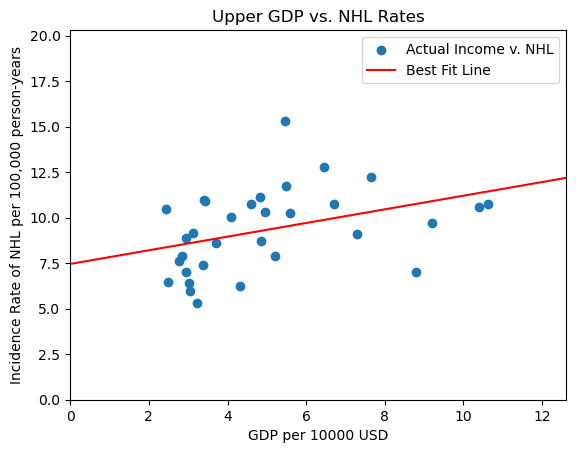


Menu Options
---------------
1. GDP vs. Non-Hodgkin Lymphoma Rates
2. Total agricultural usage vs. Non-Hodgkin Lymphoma Rates
3. Pesticide usage per capita vs. Non-Hodgkin Lymphoma Rates
4. Statistical analysis between GDP, total pesticide usage, and per capita usage vs. NHL
5. Quit

What would you like to investigate? 4



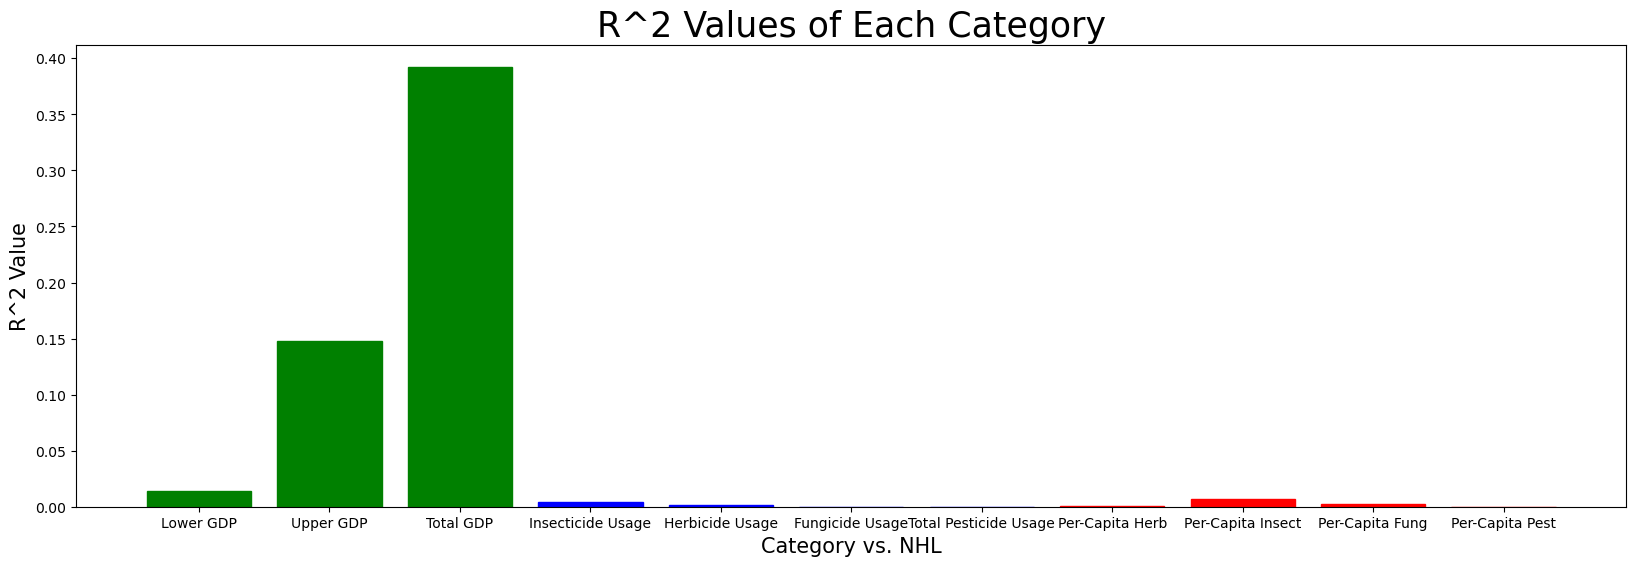

Do you want to save the figure? n

Do you want to look at the statistics of the data? y

What category would you like to look at?
Choices: Pesticide, GDP, Overall
overall

       Total GDP  Pesticide Agricultural Use   Pesticide Use Per Capita  \
count  63.000000                    63.000000                 63.000000   
mean    3.015284                 44913.640952                 91.774602   
std     2.631147                112038.353261                127.033595   
min     0.096420                     1.350000                  0.374094   
25%     0.841130                  1813.020000                 28.546000   
50%     2.427450                  8093.470000                 58.265700   
75%     4.454195                 44145.585000                 89.518800   
max    10.614880                719507.440000                724.505000   

       NHL Rates  
count  63.000000  
mean    7.543651  
std     2.873579  
min     1.300000  
25%     5.425000  
50%     7.000000  
75%    10.125000  


In [8]:
ydataNHL = my_csv_NHLbycountry

while True: #menu loop 
    print()
    menu()
    print()
    menuChoice = input("What would you like to investigate? ")
    print()
    if menuChoice == '1':
        GDPchoice = input("Would you like to investigate Non-Hodgkins Lymphoma in countries with upper or lower GDP?\nOptions: Upper, Lower, Total\n")
        print()
        GDPchoice = GDPchoice.lower() #makes sure not sensitive for capitalization
        while True:
            if GDPchoice == "upper":
                upGDPreg = regression(my_csv_upperincomeGDP, my_csv_NHLbyUpperGDPCountry)
                print(upGDPreg)
                print()
                GDPplot('Upper', my_csv_upperincomeGDP, my_csv_NHLbyUpperGDPCountry, upGDPreg.alpha, upGDPreg.beta)
                break

            elif GDPchoice == "lower":
                lowGDPreg = regression(my_csv_lowerincomeGDP, my_csv_NHLbyLowerGDPCountry)
                print(lowGDPreg)
                print()
                GDPplot('Lower', my_csv_lowerincomeGDP, my_csv_NHLbyLowerGDPCountry, lowGDPreg.alpha, lowGDPreg.beta)
                break

            elif GDPchoice == "total":
                totalGDPreg = regression(my_csv_totalGDP, ydataNHL)
                print(totalGDPreg)
                print()
                GDPplot('Total', my_csv_totalGDP, ydataNHL, totalGDPreg.alpha, totalGDPreg.beta)
                break

            else:
                print("Invalid option!")
                print()
                break 

    elif menuChoice == '2':
        pestchoice = input("What type of pesticide would you like to look into?\nOptions: Insecticide, Herbicide, Fungicide\n")
        print()
        pestchoice = pestchoice.lower()
        while True:
            if pestchoice == "insecticide" or pestchoice == "insecticides":
                InsectUsereg = regression(my_csv_totalinsecticide, ydataNHL)
                print(InsectUsereg)
                print()
                typePestplot('Insecticides', my_csv_totalinsecticide, 10000, ydataNHL, InsectUsereg.alpha, InsectUsereg.beta)

            elif pestchoice == "herbicide" or pestchoice == "herbicides":
                HerbUsereg = regression(my_csv_totalherbicide, ydataNHL)
                print(HerbUsereg)
                print()
                typePestplot('Herbicides', my_csv_totalherbicide, 10000, ydataNHL, HerbUsereg.alpha, HerbUsereg.beta)

            elif pestchoice == "fungicide" or pestchoice == "fungicides":
                FungUsereg = regression(my_csv_totalfungicide, ydataNHL)
                print(FungUsereg)
                print()
                typePestplot('Fungicides', my_csv_totalfungicide, 10, ydataNHL, FungUsereg.alpha, FungUsereg.beta)

            else:
                print("Invalid option!")
                print()
            break #breaks inner loop

    elif menuChoice == '3':
        pestchoice = input("What type of pesticide would you like to look into?\nOptions: Insecticide, Herbicide, Fungicide\n")
        print()
        pestchoice = pestchoice.lower()
        while True:
            if pestchoice == "insecticide" or pestchoice == "insecticides":
                InsectPCreg = regression(my_csv_PerCapitaInsecticide, ydataNHL)
                print(InsectPCreg)
                print()
                perCapitaplot('Insecticides', my_csv_PerCapitaInsecticide, ydataNHL, InsectPCreg.alpha, InsectPCreg.beta)

            elif pestchoice == "herbicide" or pestchoice == "herbicides":
                HerbUsereg = regression(my_csv_PerCapitaHerbicide, ydataNHL)
                print(HerbUsereg)
                print()
                perCapitaplot('Herbicides', my_csv_PerCapitaHerbicide, ydataNHL, HerbUsereg.alpha, HerbUsereg.beta)

            elif pestchoice == "fungicide" or pestchoice == "fungicides":
                FungUsereg = regression(my_csv_PerCapitaFungicide, ydataNHL)
                print(FungUsereg)
                print()
                perCapitaplot('Fungicides', my_csv_PerCapitaFungicide, ydataNHL, FungUsereg.alpha, FungUsereg.beta)
                
            else:
                print("Invalid option!")
                print()
            break #breaks inner loop

    elif menuChoice == '4':
        #calculates regression and appends R^2 value to dictionary
        lowGDPreg = regression(my_csv_lowerincomeGDP, my_csv_NHLbyLowerGDPCountry)
        R2dict['Lower GDP'] = lowGDPreg.R2()
        upGDPreg = regression(my_csv_upperincomeGDP, my_csv_NHLbyUpperGDPCountry)
        R2dict['Upper GDP'] = upGDPreg.R2()
        totalGDPreg = regression(my_csv_totalGDP, ydataNHL)
        R2dict['Total GDP'] = totalGDPreg.R2()

        #appends Total Agricultural Usage Results to dict
        InsectUsereg = regression(my_csv_totalinsecticide, ydataNHL)
        R2dict['Insecticide Usage'] = InsectUsereg.R2()
        HerbUsereg = regression(my_csv_totalherbicide, ydataNHL)
        R2dict['Herbicide Usage'] = HerbUsereg.R2()
        FungUsereg = regression(my_csv_totalfungicide, ydataNHL)
        R2dict['Fungicide Usage'] = FungUsereg.R2()
        TotPestUsereg = regression(my_csv_totalPesticide, ydataNHL)
        R2dict['Total Pesticide Usage'] = TotPestUsereg.R2()

        #appends Per Capita UsageResults to dict
        InsectPCreg = regression(my_csv_PerCapitaInsecticide, ydataNHL)        
        R2dict['Per-Capita Herb'] = InsectPCreg.R2()
        HerbPCreg = regression(my_csv_PerCapitaHerbicide, ydataNHL)
        R2dict['Per-Capita Insect'] = HerbPCreg.R2()
        FungPCreg = regression(my_csv_PerCapitaFungicide, ydataNHL)
        R2dict['Per-Capita Fung'] = FungPCreg.R2()
        TotPestPCreg = regression(my_csv_PerCapitaPesticide, ydataNHL)
        R2dict['Per-Capita Pest'] = TotPestUsereg.R2()
        
        R2valuesplot(R2dict) #plots all R2 values into one graph
        
        while True:
            save = input("Do you want to save the figure? ")
            print()
            save.lower()
            if save == 'yes' or save == 'y':
                plt.savefig('CombinedR2Val.pdf') #saves R^2 Results to user's computer
            elif save == 'no' or save == 'n':
                break
            else:
                print("Please input a valid response.")
                print()


        while True:    
            choice = input("Do you want to look at the statistics of the data? ")
            print()
            choice = choice.lower()
            if choice == 'yes' or choice == 'y':
                topic = input("What category would you like to look at?\nChoices: Pesticide, GDP, Overall\n")
                print()
                topic = topic.lower()
                
                if topic == 'pesticide' or topic == 'pesticides':
                    #creates statistics of Pesticide Data
                    pestarray = np.array([my_csv_totalherbicide, my_csv_PerCapitaHerbicide, my_csv_totalinsecticide, my_csv_PerCapitaInsecticide, my_csv_totalfungicide, my_csv_PerCapitaFungicide]) #creates 2d array of data
                    pestarray = pestarray.T #transposes array to ensure correct shape for data frame
                    pestDF = pd.DataFrame(pestarray, columns = ['Herbicide Agricultural Use', 'Herbicide Use Per Capita', 'Insecticide Agricultural Use', 'Insecticide Use Per Capita', 'Fungicide Agricultural Use', 'Fungicide Use Per Capita']) 
                    print(pestDF.describe())
                    break #breaks inner loop

                elif topic == 'gdp':
                    #creates statistics of GDP Data
                    GDParray = np.array([my_csv_lowerincomeGDP, my_csv_NHLbyLowerGDPCountry, my_csv_upperincomeGDP, my_csv_NHLbyUpperGDPCountry])
                    GDParray = GDParray.T
                    GDPdf = pd.DataFrame(GDParray, columns = ['Lower GDP', 'NHL Rates of Lower GDP Countries', 'Upper GDP', 'NHL Rates of Upper GDP Countries'])
                    print(GDPdf.describe())
                    break #breaks inner loop

                elif topic == 'overall':
                    #creates statistics of Total Data
                    totalarray = np.array([my_csv_totalGDP, my_csv_totalPesticide, my_csv_PerCapitaPesticide, my_csv_NHLbycountry])
                    totalarray = totalarray.T
                    pestDF = pd.DataFrame(totalarray, columns = ['Total GDP', 'Pesticide Agricultural Use ', 'Pesticide Use Per Capita', 'NHL Rates'])
                    print(pestDF.describe())
                    break #breaks inner loop

                else:
                    print("Invalid option!")
                    print()

            elif choice == 'no' or choice == 'n':
                break
                
            else:
                print("Invalid option!")
                print()


    elif menuChoice == '5':
        print("Goodbye")
        break #breaks menu loop

    else:
        print("Invalid menu option!")
        print()


In [9]:
print(R2dict) #prints final R^2 values for user

{'Lower GDP': 0.014420765274306673, 'Upper GDP': 0.14800099433777159, 'Total GDP': 0.39253594540571407, 'Insecticide Usage': 0.004267771222911039, 'Herbicide Usage': 0.0014410534617754422, 'Fungicide Usage': 4.910083134581261e-05, 'Total Pesticide Usage': 7.758026136865827e-05, 'Per-Capita Herb': 0.000692698192778238, 'Per-Capita Insect': 0.006662972535096134, 'Per-Capita Fung': 0.0027441964275260254, 'Per-Capita Pest': 7.758026136865827e-05}
